<a href="https://colab.research.google.com/github/rahulsait/ExcelR-codes/blob/main/SIMPLE_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case : The Newspaper Data**

### **In order to investigate the feasibility of starting a Sunday edition for a large metropolitan newspaper, information was obtained from a sample of 34 newspapers concerning their daily and Sunday circulations.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
%matplotlib inline

In [2]:
# let's upload the dataset :
data = pd.read_csv("/content/NewspaperData.csv")

In [3]:
data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


**We build Regression Eqn with** **X = daily** and **Y = sunday :**

In [4]:
data.info() # .info() gives info in brief

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [5]:
# data.info gives info of each entry

## **Correlation :**

In [6]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


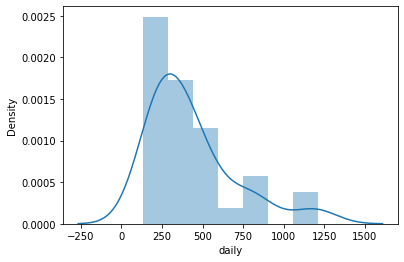

In [7]:
# Plotting the variables on Histogram with Density Plot - Dist plot :
sns.distplot(data["daily"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


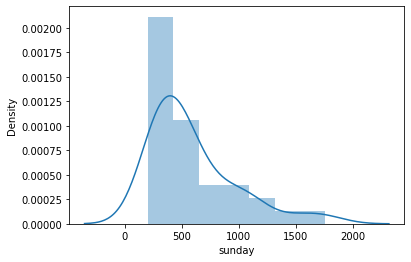

In [8]:
sns.distplot(data["sunday"])

## **Fitting a Linear Regression Model :**

**Building a Regression Model :**

In [9]:
import statsmodels.formula.api as smf
model = smf.ols("sunday ~ daily", data = data).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


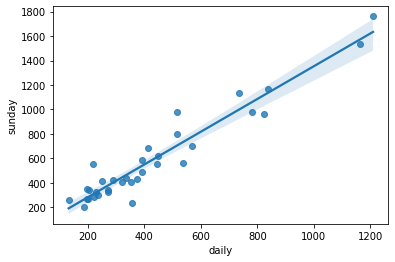

In [10]:
sns.regplot(x = "daily", y = "sunday", data = data);

**Coefficients - Model Parameters :**

In [11]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

Y = B0 + B1*X

**B0 : Intercept = 13.835**

**B1 : Slope = 1.3397**

**Coefficient of Determination : R2**

In [12]:
model.rsquared

0.9180596895873295

**R2 > 0.9  -- Excellent Equation**

**Computing t-values and P-values :**

In [13]:
# t-values :
model.tvalues

Intercept     0.386427
daily        18.934840
dtype: float64

**B0 : 0.386**

**B1 : 18.93**

In [14]:
# P-values :
model.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

**B0 : 0.7**

**B1 : 0**

In [15]:
p_value = model.pvalues.values[1]

In [16]:
p_value

6.016802409084756e-19

In [17]:
alpha = 0.05

**Hypothesis testing :**

In [18]:
H0 = "No such statistical relationship exist between variables."
Ha = "There exists a significant relationship between variables."

In [19]:
if p_value < alpha :
  print("The 'daily' variable is of a significant importance in relation to 'sunday' variable.\n", Ha)
else :
  print("The 'daily' variable is of not much importance.\n", H0)


The 'daily' variable is of a significant importance in relation to 'sunday' variable.
 There exists a significant relationship between variables.


## **Now, let's predict for new data points :**
let's say for the "daily" Newspaper circulations of 200 and 300

In [20]:
newdata = pd.Series([200,300])

In [21]:
newdata

0    200
1    300
dtype: int64

In [22]:
data_pred = pd.DataFrame(newdata, columns = ["daily"])

In [23]:
data_pred

,daily
0,200
1,300


In [24]:
# now we input the column having the new data points into our Model created :
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64

**So for the 200 and 300 daily circulations of newspaper, we can expect that the sunday issues could be around 281 and 415 respectively.**

# **Waist Circumference - Adipose Tissue**

## **A group of researchers conducted a study with the aim of predicting Abdominal AT area using simple Anthropometric measurements i.e. measurements on the human body.** 

## **The Waist Circumference - AT data is a part of this study wherein the aim is to study how well the Waist Circumference predicts the AT area.**

# **Also predict for the data points : 65, 150 and 40.**

**Importing all the required libs :**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
%matplotlib inline

**Uploading the Dataset :**

In [26]:
dataset = pd.read_csv("/content/WC_AT.csv")

In [27]:
dataset.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [28]:
dataset.info 

<bound method DataFrame.info of       Waist      AT
0     74.75   25.72
1     72.60   25.89
2     81.80   42.60
3     83.95   42.80
4     74.65   29.84
..      ...     ...
104  100.10  124.00
105   93.30   62.20
106  101.80  133.00
107  107.90  208.00
108  108.50  208.00

[109 rows x 2 columns]>

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


**We build a regression equation with X = Waist Circumference (WC) and Y = Adipose Tissue (AT)**

**Correlation between WC and AT :**

In [30]:
dataset.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


**Plotting the variables on Histogram with density plot :**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


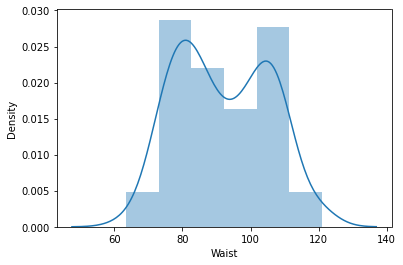

In [31]:
sns.distplot(dataset["Waist"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


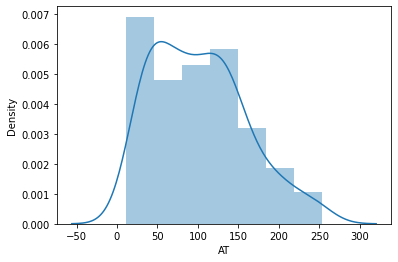

In [32]:
sns.distplot(dataset["AT"])

## **Fitting a Linear Regression model**

**Building a Regression model :**

In [33]:
import statsmodels.formula.api as smf
model = smf.ols("AT ~ Waist", data = dataset).fit()

**Scatter Plot between the variables :**

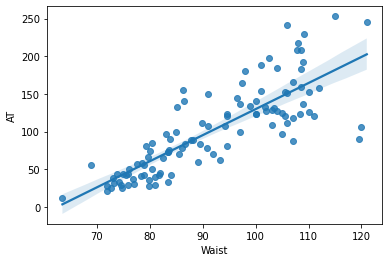

In [34]:
sns.regplot(x = "Waist", y = "AT", data = dataset);

**Coefficients - Model parameters :**

In [35]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

Y = B0 + B1*X

**B0 : -215.981**

**B1 : 3.458**

**Coefficient of Determination (R2) :**

In [36]:
model.rsquared

0.670036893052843

**R2 is between (0.64,0.7) -- The Equation is somewhat okay.**

**Computing t-values and p-values :**

In [37]:
model.tvalues

Intercept    -9.909103
Waist        14.740376
dtype: float64

**B0 : -9.909**

**B1 : 14.740**

In [38]:
model.pvalues

Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64

**B0 : 0**

**B1 : 0**

## **Predicting for the new data points :**

In [39]:
new_dataset = pd.Series([65,150,40])

In [40]:
new_dataset

0     65
1    150
2     40
dtype: int64

In [41]:
data_pred = pd.DataFrame(new_dataset, columns = ["Waist"])

In [42]:
data_pred

,Waist
0,65
1,150
2,40


In [43]:
model.predict(data_pred)

0      8.844373
1    302.847421
2    -77.627112
dtype: float64

We got one of the predicted values of the area of "AT" in Negative which is senseless due to the reason that a new data point (45) among the three data points i.e. (65,150 and 40) is not in the range of values of "Waist" data set.

### **Range of "Waist" :**

In [49]:
dataset["Waist"].describe()

count    109.000000
mean      91.901835
std       13.559116
min       63.500000
25%       80.000000
50%       90.800000
75%      104.000000
max      121.000000
Name: Waist, dtype: float64

**Range of "Waist" : max - min = 121 - 63.50 = 57.50**